In [1]:
import os
import time
import numpy as np
import random
import sys
import netCDF4 as ncdf

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.ticker import LongitudeFormatter , LatitudeFormatter

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

In [2]:
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
expname = ["SPCAM", "NNCAM", "NNCAM(PhyC)", "CAM5"]#, "new50_rh1d"]
# caserealname = ["spcam.baseline", "2021_11_15", "baseline_nn_rh", "2022_11_10"]
caserealname = ["spcam.baseline", "2021_11_15", "crash1_rh_rerun0612", "2022_11_10"]

spcam_path    = "/temp_share/nncam-cases/nncam-diag_spcam/spcam.baseline/atm/hist/"
nncam_path    = "/temp_share/nncam-cases/nncam-couple/2021_11_15/atm/hist/"
nncamrh_path  = "/temp_share/stabilities.analysis/hist.plot/hist.nc-data/case1_6years/"
# nncamrh_path  = "/temp_share/nncam-cases/neuroGCM/baseline_nn_rh/atm/hist/"
cam5_path     = "/temp_share/nncam-cases/nncam-diag_cam5/2022_11_10/atm/hist/"

filepath = [spcam_path, nncam_path, nncamrh_path, cam5_path]

print(filepath)
          
# savepath='{}.plot'.format(expname)
# if os.path.isdir(savepath) is False:
#     os.mkdir(savepath)  

['/temp_share/nncam-cases/nncam-diag_spcam/spcam.baseline/atm/hist/', '/temp_share/nncam-cases/nncam-couple/2021_11_15/atm/hist/', '/temp_share/stabilities.analysis/hist.plot/hist.nc-data/case1_6years/', '/temp_share/nncam-cases/nncam-diag_cam5/2022_11_10/atm/hist/']


In [4]:
lenth = 5 * 12

# yearbuff  = ['0002', '0003', '0004', '0005', '0006']#, 2002]#,2003]
yearbuff  = [1999, 2000, 2001, 2002, 2003]
monthbuff = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
precip    = np.zeros((len(expname),lenth,96,144))

# 读取数据
ii=0

date_str = []

for iyear in yearbuff:
    for imonth in monthbuff:
        for icase, casename in enumerate(caserealname):
            filename = "{}.cam.h0.{:04d}-{:02d}.nc".format(casename,iyear, imonth)
            data     = ncdf.Dataset(os.path.join(filepath[icase], filename),'r')
            precip[icase, ii,:,:] = data['PRECC'][0,:,:]*24*3600*1000

        ii+=1

        print("{:04d}-{:02d}".format(iyear, imonth))

1999-01
1999-02
1999-03
1999-04
1999-05
1999-06
1999-07
1999-08
1999-09
1999-10
1999-11
1999-12
2000-01
2000-02
2000-03
2000-04
2000-05
2000-06
2000-07
2000-08
2000-09
2000-10
2000-11
2000-12
2001-01
2001-02
2001-03
2001-04
2001-05
2001-06
2001-07
2001-08
2001-09
2001-10
2001-11
2001-12
2002-01
2002-02
2002-03
2002-04
2002-05
2002-06
2002-07
2002-08
2002-09
2002-10
2002-11
2002-12
2003-01
2003-02
2003-03
2003-04
2003-05
2003-06
2003-07
2003-08
2003-09
2003-10
2003-11
2003-12


In [5]:
# temp_cp = precip[0].mean(axis=0)
# print(temp_cp.shape)
# plt.imshow(temp_cp)

In [6]:
# def plot_single_precip(precip, plotrange, extents):
    
#     font1 = {'weight':'normal','size':8.5}
#     fig   = plt.figure(figsize=(12, 2))

#     jlon = np.linspace(0,357.5,144)
#     jlat = np.linspace(-90,90,96)

#     prj = ccrs.PlateCarree(central_longitude = 0)
#     color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 非等距 color bar

#     axs = fig.add_subplot(projection = ccrs.Robinson(central_longitude=180)) 
#     axs.add_feature(cfeat.COASTLINE , edgecolor = '#333333', linewidth=0.5)
#   # cs0 = axs.contourf(jlon, jlat, precip, np.linspace(plotrange[0], plotrange[1], 21), cmap =plt.cm.coolwarm, extend='both', transform = prj)
#     cs0 = axs.contourf(jlon, jlat, precip, color_interval, cmap =plt.cm.coolwarm, extend='both', transform = prj)
#     axs.tick_params(labelsize = 7)
#     axs.set_title("Single Plot", font1, loc = "left")
#     cax = plt.colorbar(cs0, ax = axs, orientation='vertical',shrink = 0.7)
#     cax.ax.tick_params(labelsize = 6)
    
#     plt.tight_layout()
    
# #     return fig, axs, cax
    
#     return {'fig': fig, 'axs': axs, 'cax': cax}

In [7]:
def plot_single_precip(fig, gs, i, j, precip, plotrange, extents):
    
    font1 = {'weight':'normal','size':8.5}
    jlon = np.linspace(0,357.5,144)
    jlat = np.linspace(-90,90,96)
    prj = ccrs.PlateCarree(central_longitude = 0)
    color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 非等距 color bar

    axs = fig.add_subplot(gs[i, j], projection = ccrs.Robinson(central_longitude=180))
  # axs = fig.add_subplot(projection = ccrs.Robinson(central_longitude=180)) 
    axs.add_feature(cfeat.COASTLINE, edgecolor = '#333333', linewidth=0.5)
  # cs0 = axs.contourf(jlon, jlat, precip, np.linspace(plotrange[0], plotrange[1], 21), cmap =plt.cm.coolwarm, extend='both', transform = prj)
    cs0 = axs.contourf(jlon, jlat, precip, color_interval, cmap =plt.cm.coolwarm, extend='both', transform = prj)
    axs.tick_params(labelsize = 7)
    axs.set_title("Single Plot", font1, loc = "left")
  # cax = plt.colorbar(cs0, ax = axs, orientation='vertical',shrink = 0.7)
  # cax.ax.tick_params(labelsize = 6)
    
    return {'fig': fig, 'axs': axs, "cs0": cs0} #, 'cax': cax}

In [8]:
# plot_single_precip(temp_cp, [0,17], [0,357.5,-90,90])

/cust_users/x-w19/local/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


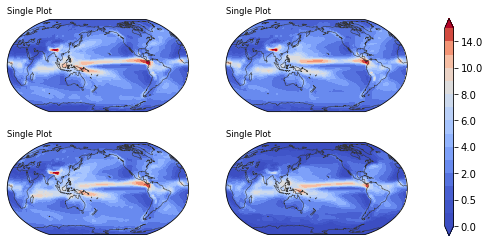

In [9]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 4))
# gs  = gridspec.GridSpec(2, 2, figure=fig)
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)

# 假设你有 6 个 precip 数据
# precips = [precip1, precip2, precip3, precip4, precip5, precip6]

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        plot = plot_single_precip(fig, gs, i, j, precip[i*2+j].mean(axis=0), [0,17], [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:2, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

# plt.subplots_adjust(hspace=1, wspace=1)
plt.tight_layout()
plt.savefig('multi_precipitation_plot.pdf')